# 課題1: データ前処理の実習

ここではデータの前処理について理解いただくための課題を用意しました。この課題ではkaggleのcompetitionで使用されたデータを用いてデータの前処理方法を確認します。

各列の詳細は下記サイトをご参照ください。
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

各セルに入っているコメントの下に、実行するコードを記入してください。わからない場合は、ここまでのレッスン内容や各種ライブラリの公式ドキュメントを参照しましょう。

## 1. 必要なモジュールの読み込み

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グラフをノートブックで表示するための設定
%matplotlib inline

## 2. データの読み込み

CSVファイル"kaggle_housing_price.csv"を読み込み、内容を確認します。

In [2]:
# データを変数datasetに読み込む
dataset = pd.read_csv("kaggle_housing_price.csv")
type(dataset)

pandas.core.frame.DataFrame

In [3]:
# データの最初の5行を表示
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


DataFrameの`shape` プロパティで全データの行数と列数を取得できます。

参照：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html

In [4]:
# データの行数、列数を表示
dataset.shape

(1460, 81)

## 3. 要約統計量を出力する

データ数、平均や中央値、標準偏差などの統計量を確認し、データへの理解を深めます。

なお、DataFrameの `describe()` を使うと、様々な統計量の情報を要約として表示してくれます。

参考：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.describe.html

In [5]:
# 要約統計量を表示
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 4. 基本的なデータの操作

データの抽出・列の分割について学びます。

### インデックスを用いた行の指定

In [6]:
# インデックス番号0から10の行を抽出
dataset.iloc[:11]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
# 「SalePrice」と「LotArea」の列を抽出し、最初の10行だけ表示
dataset[['SalePrice', 'LotArea']][:11]

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
5,143000,14115
6,307000,10084
7,200000,10382
8,129900,6120
9,118000,7420


### カラム間の演算

PandasのDataFrameでは、列同士の四則演算、ならびに新しい列を追加することができます。

たとえば、`df` というDataFrameの変数があり、中に `a`,`b` というカラムが存在するとき、`df['c'] = df['a'] + df['b']` と記述することで、a列とb列の加算結果を c という新しい列として df に追加してくれます。

In [8]:
# 「1stFlrSF」と「2ndFlrSF」を合計した「FlrSF_total」を新たな列としてdatasetに加える
dataset["FlrSF_total"] = dataset["1stFlrSF"] + dataset["2ndFlrSF"]

In [9]:
# datasetからiloc関数を使用して「1stFlrSF」と「2ndFlrSF」、「FlrSF_total」を先頭から5行分表示し、正しく追加されていることを確認する
dataset.iloc[:5, [43,44,81]]

,1stFlrSF,2ndFlrSF,FlrSF_total
0,856,854,1710
1,1262,0,1262
2,920,866,1786
3,961,756,1717
4,1145,1053,2198


 ### ダミー変数の作成
 
列 `SaleType` は `WD`, `New`, `COD` などで構成されたカテゴリーデータです。 `get_dummies()` 関数を使用してダミー変数に変換しましょう。

参考：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.get_dummies.html

In [10]:
# 列'SaleType'をダミー変数に展開したものを変数 dataset に上書きします。
dataset = pd.get_dummies(data=dataset, columns=['SaleType'])

In [11]:
# ダミー変数が作成されていることを確認します　(datasetの最初の5行だけ出力)
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,FlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1710,0,0,0,0,0,0,0,0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,1262,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1786,0,0,0,0,0,0,0,0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1717,0,0,0,0,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2198,0,0,0,0,0,0,0,0,1


### フィルタリング

DataFrameの `query()` を使いフィルタリングを行いましょう

参考：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.query.html

In [12]:
# 'YearBuilt'が2000以降の物件のみを抽出し、最初の5件のみ表示
dataset.query("YearBuilt >= 2000").head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,FlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1710,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1786,0,0,0,0,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2198,0,0,0,0,0,0,0,0,1
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,1694,0,0,0,0,0,0,0,0,1
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,2324,0,0,0,0,0,0,1,0,0


`dataset.query('LotArea >= 15000 and MSSubClass >= 50')` のように複数の条件を指定することも可能です。

In [13]:
# 'YearBuilt'が2000以降、'GarageCars'が2以上の物件を抽出
dataset.query("YearBuilt >= 2000 and GarageCars >= 2").head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,FlrSF_total,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1710,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1786,0,0,0,0,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2198,0,0,0,0,0,0,0,0,1
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,1694,0,0,0,0,0,0,0,0,1
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,2324,0,0,0,0,0,0,1,0,0


## 5. データの可視化

データを理解するには要約統計量や抽出したデータを確認するだけでは不十分であり、可視化が必要です。

### ヒストグラム

連続変数の分布を確認する際に有効です。DataFrameの `hist()` が使えます。

参考：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html

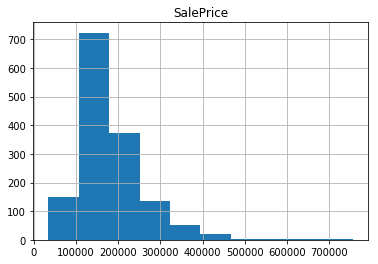

In [17]:
# datasetの'SalePrice'をヒストグラムで表示
df = pd.DataFrame({'SalePrice':dataset["SalePrice"]})
hist = df.hist()

### 散布図

2つの変数の関係性を確認する際に有効です。DataFrameの `plot()` が使えます。

参考：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

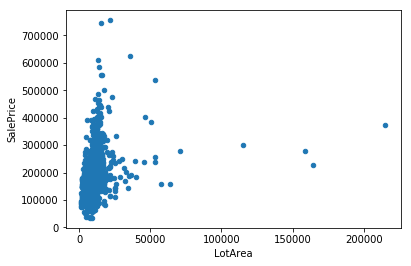

In [18]:
# datasetの'LotArea'と'SalePrice'を散布図で表示
dataset.plot(kind='scatter', x='LotArea', y='SalePrice')

### 棒グラフ

大小や増減を比較する際に有効です。DataFrameの `plot.bar()` が使えます。

参考：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html

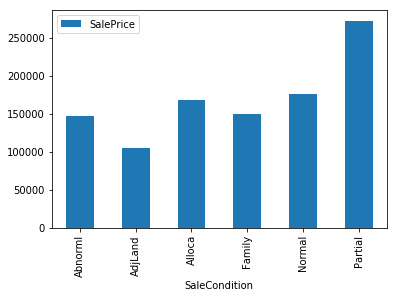

In [20]:
#'SalePrice'のSaleCondition毎の平均を変数　price_by_conditionに格納
price_by_condition = dataset[['SalePrice', 'SaleCondition']].groupby('SaleCondition').mean().reset_index()

# price_by_conditionが持つ、棒グラフを表示する命令を実行
price_by_condition.plot.bar(x='SaleCondition')

### 箱ヒゲ図 (Boxplot) 

複数の変数の分布を比較する際に有効です。 （棒グラフでは平均の比較はできますが、分布全体の比較はできません)

DataFrameの `boxplot()` が使えます。

参考：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.boxplot.html

Text(0.5,1,'')

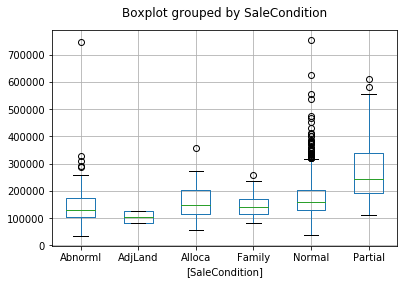

In [29]:
# datasetの'SaleCondition'ごとに'SalePrice'をboxplotで表示
ax = dataset[['SalePrice', 'SaleCondition']].boxplot(by='SaleCondition')
ax.set_title("")

## 6. 欠損値の確認

ある列が欠損値を持っているかどうかは Pandas の `isnull()` でわかります。`pd.isnull(dataset['LotFrontage'])`　のように記述します。また、`.sum()` をつなげることで、その列で欠損値を持つ行数がわかります。

参考：http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.isnull.html

In [30]:
# 列ごとに欠損値の有無を確認
dataset.isnull().sum()

Id                   0
MSSubClass           0
MSZoning             0
LotFrontage        259
LotArea              0
Street               0
Alley             1369
LotShape             0
LandContour          0
Utilities            0
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
RoofStyle            0
RoofMatl             0
Exterior1st          0
Exterior2nd          0
MasVnrType           8
MasVnrArea           8
ExterQual            0
ExterCond            0
Foundation           0
                  ... 
GarageFinish        81
GarageCars           0
GarageArea           0
GarageQual          81
GarageCond          81
PavedDrive           0
WoodDeckSF           0
OpenPorchSF          0
EnclosedPorch        0
3SsnPorch            0
ScreenPorch          0
PoolArea             0
PoolQC     